# PyCaret Regression Tutorial

Loading Libraries

In [1]:
from pycaret.regression import *
import pandas as pd

# Importing data

In [2]:
test = pd.read_csv("/home/sionc/Jupyter notebooks/housing_prices/test.csv")
train = pd.read_csv("/home/sionc/Jupyter notebooks/housing_prices/train.csv")
sample = pd.read_csv("/home/sionc/Jupyter notebooks/housing_prices/sample_submission.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Setting up the environment

In [8]:
#list of columns that are categorical
cat_f = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']

In [9]:
exp_reg101 = setup(data = train, target = 'SalePrice', categorical_features = cat_f,
                   ignore_features= ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
                   normalize = True,session_id = 123)

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 388)"


# Comparing all models

In [10]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18176.3855,867137814.7742,28822.3539,0.8703,0.1443,0.1069,0.2210
lightgbm,Light Gradient Boosting Machine,18154.0669,949355475.9588,30029.7128,0.8606,0.1505,0.1079,0.1410
par,Passive Aggressive Regressor,16463.4704,1110671416.7952,31104.2436,0.8365,0.1431,0.0994,0.3530
rf,Random Forest Regressor,19525.6068,1120376848.4481,32587.2465,0.8355,0.1601,0.1160,0.5900
huber,Huber Regressor,16477.0076,1119714645.1301,30759.6075,0.8343,0.1481,0.1006,0.3200
br,Bayesian Ridge,18947.7032,1304471301.3090,33928.4797,0.8067,0.1638,0.1146,0.1430
ada,AdaBoost Regressor,26521.3472,1445559605.9269,37475.0564,0.7831,0.2104,0.1724,0.1790
ridge,Ridge Regression,20352.8269,1448307145.6000,35823.7732,0.7824,0.1828,0.1237,0.0210
knn,K Neighbors Regressor,21635.0488,1487883632.0000,37399.5518,0.7766,0.1767,0.1245,0.0430
en,Elastic Net,21022.8465,1548882361.6000,37511.0645,0.7726,0.1650,0.1216,0.0220


# Creating  Model

In [11]:
# all the models that are available are 
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Since Gradient boost regressor had the highest R2 score, we will use that

In [12]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,21524.6948,1862556974.1589,43157.3513,0.7725,0.1833,0.1251
1,17337.7410,660064091.7065,25691.7125,0.8970,0.1293,0.0947
2,14939.9424,446605899.8919,21133.0523,0.9033,0.1330,0.0982
3,16235.8481,716516589.4848,26767.8275,0.8619,0.1401,0.0990
4,20936.6764,1258851833.9187,35480.3021,0.8719,0.1920,0.1386
5,18239.3257,838445274.4774,28955.9195,0.8838,0.1385,0.1059
6,17769.3940,627863399.3299,25057.2025,0.8668,0.1231,0.1003
7,20237.9019,951579977.1636,30847.6900,0.8604,0.1562,0.1165
8,18421.1611,700591253.4240,26468.6844,0.8954,0.1317,0.1035
9,16121.1694,608302854.1864,24663.7964,0.8898,0.1152,0.0872


Now we tune it

In [13]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22573.4256,2483940505.5249,49839.1463,0.6966,0.1943,0.1320
1,17563.3018,790366445.7402,28113.4567,0.8767,0.1372,0.0975
2,14475.0110,385952507.8741,19645.6740,0.9164,0.1279,0.0963
3,16792.2624,739199630.5153,27188.2260,0.8575,0.1434,0.1038
4,22140.5323,1741928086.4090,41736.4120,0.8228,0.1786,0.1282
5,16524.5228,742237151.7373,27244.0297,0.8972,0.1464,0.1014
6,16632.9264,558121523.8215,23624.5957,0.8816,0.1159,0.0923
7,20217.2222,919578256.4185,30324.5487,0.8651,0.1547,0.1180
8,20598.3566,1270886907.6165,35649.5008,0.8103,0.1678,0.1181
9,16169.7669,721919155.8499,26868.5533,0.8692,0.1141,0.0823


In [14]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


# Plotting Model

In [24]:
plot_model?

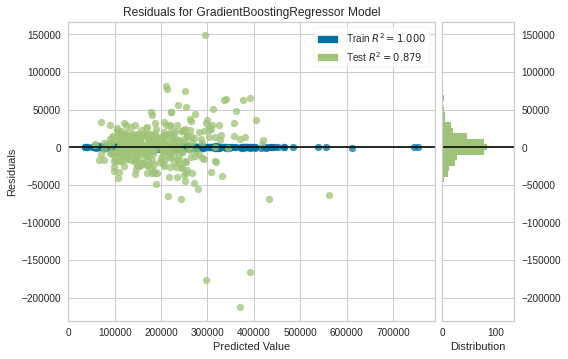

In [15]:
plot_model(tuned_gbr)

Prediction error plot

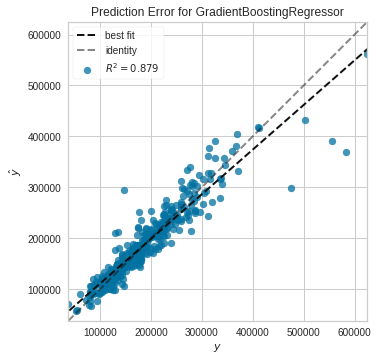

In [16]:
plot_model(tuned_gbr, plot = 'error')

feature importance plot

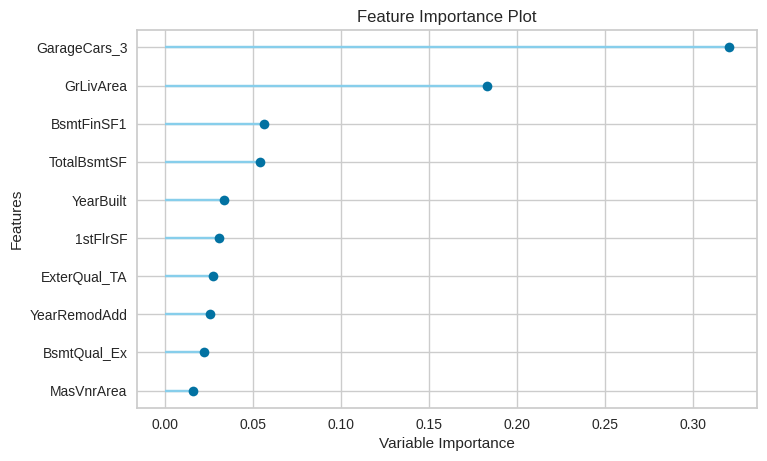

In [17]:
plot_model(tuned_gbr, plot = 'feature')

In [29]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Prediction on Test Data

In [18]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15800.1927,693792921.9425,26339.9492,0.8789,0.1213,0.0870


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,-1.272361e-07,-0.083283,1.006072,0.776422,0.425879,-0.932105,-0.282439,0.712865,-0.373171,-0.704502,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500.0,228348.299972
1,-4.328227e-01,-0.073642,-2.291676,-1.686512,-0.573652,-0.932105,-0.282439,1.188206,0.088824,-0.175961,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000.0,119162.181893
2,-1.728379e+00,-0.706573,1.104025,0.921300,0.076043,-0.932105,-0.282439,0.920123,-0.171733,-0.474048,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000.0,142247.403368
3,2.612252e-01,-0.058420,0.908119,0.631543,-0.573652,1.130870,-0.282439,-0.978989,0.117288,-0.143397,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300.0,254109.803682
4,-4.328227e-01,0.061326,-0.822382,-1.686512,-0.573652,0.295101,-0.282439,-0.528429,-0.309675,-0.293693,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000.0,149055.820815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-4.328227e-01,-0.349465,-1.834562,1.017886,-0.573652,-0.932105,-0.282439,0.262305,-0.811082,-0.982549,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000.0,121426.025504
435,-8.955212e-01,-0.438970,-0.528524,-1.493340,-0.573652,-0.932105,-0.282439,0.548410,-0.533009,-0.887362,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000.0,114227.691248
436,4.925745e-01,-0.008695,1.136676,0.969593,0.414773,-0.932105,-0.282439,1.041774,-0.053497,-0.318742,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500.0,285987.007833
437,7.239237e-01,0.030375,1.071374,0.921300,1.047809,0.900240,-0.282439,-0.981242,-0.123563,-0.398900,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000.0,289094.540874


# Finalize Model for Deployment

In [19]:
final_gbr = finalize_model(tuned_gbr)

In [20]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [21]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,631.9604,835339.9681,913.9693,0.9999,0.0061,0.0040


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,-1.272361e-07,-0.083283,1.006072,0.776422,0.425879,-0.932105,-0.282439,0.712865,-0.373171,-0.704502,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,222500.0,222703.570440
1,-4.328227e-01,-0.073642,-2.291676,-1.686512,-0.573652,-0.932105,-0.282439,1.188206,0.088824,-0.175961,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000.0,87322.508012
2,-1.728379e+00,-0.706573,1.104025,0.921300,0.076043,-0.932105,-0.282439,0.920123,-0.171733,-0.474048,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,130000.0,130797.082712
3,2.612252e-01,-0.058420,0.908119,0.631543,-0.573652,1.130870,-0.282439,-0.978989,0.117288,-0.143397,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,274300.0,274649.418133
4,-4.328227e-01,0.061326,-0.822382,-1.686512,-0.573652,0.295101,-0.282439,-0.528429,-0.309675,-0.293693,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,140000.0,141948.460505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-4.328227e-01,-0.349465,-1.834562,1.017886,-0.573652,-0.932105,-0.282439,0.262305,-0.811082,-0.982549,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000.0,125874.865859
435,-8.955212e-01,-0.438970,-0.528524,-1.493340,-0.573652,-0.932105,-0.282439,0.548410,-0.533009,-0.887362,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,93000.0,94191.057598
436,4.925745e-01,-0.008695,1.136676,0.969593,0.414773,-0.932105,-0.282439,1.041774,-0.053497,-0.318742,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500.0,275022.754269
437,7.239237e-01,0.030375,1.071374,0.921300,1.047809,0.900240,-0.282439,-0.981242,-0.123563,-0.398900,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000.0,283539.610001


In [22]:
#notice how the r2 has increased to 0.9999, thats because the model has trained on the whole dataset

# Predict on unseen data

In [23]:
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,140190.602856
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,158349.265902
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,190883.414415
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190311.355346
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,196168.621760


# Saving model

In [28]:
save_model(final_gbr,'Final GBR Model 7Jul2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['MSZoning',
                                                             'Exterior1st',
                                                             'Exterior2nd',
                                                             'KitchenQual',
                                                             'Functional',
                                                             'SaleType',
                                                             'Street',
                                                             'LotShape',
                                                             'LandContour',
                                                             'LotConfig',
                                                             'LandSlope',
                                                             'Neighborhood',
                                                       